In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import xgboost as xgb
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import cross_val_score

## Reading Clean DataSet

In [4]:
merged_data = pd.read_csv('data/clean_data/merged_data.csv')
ml_data = merged_data
ml_data

,Year,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price_adjusted,average_storey
0,2017,100.0,1,1999,81.333333,345907.470070,5.0
1,2017,86.0,16,2000,82.500000,314930.681705,2.0
2,2017,110.0,4,2006,88.916667,888001.266448,20.0
3,2017,111.0,4,2003,85.666667,826047.689719,20.0
4,2017,92.0,1,2013,95.250000,727954.526565,29.0
...,...,...,...,...,...,...,...
143673,2024,90.0,1,2003,78.416667,495000.000000,2.0
143674,2024,94.0,1,2019,94.916667,630000.000000,8.0
143675,2024,93.0,1,2018,93.833333,528000.000000,2.0
143676,2024,93.0,1,2019,94.666667,630000.000000,8.0


In [5]:
X, y = ml_data.drop(columns='resale_price_adjusted'), ml_data['resale_price_adjusted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Goodness of Fit of Model on Train Dataset:
Explained Variance (R^2): 0.6236178605747216
Mean Squared Error (MSE): 11878818733.432356

Goodness of Fit of Model on Test Dataset:
Explained Variance (R^2): 0.6224830251602318
Mean Squared Error (MSE): 11593789014.057327



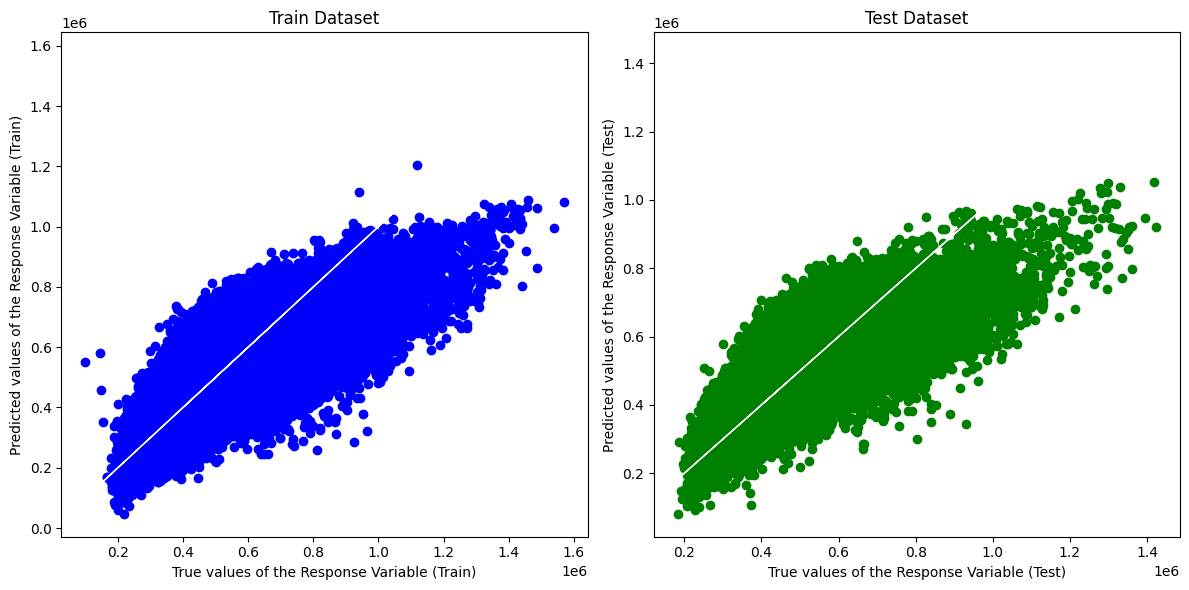

In [6]:
# Train a linear regression model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Predictions
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Model Evaluation
print("Goodness of Fit of Model on Train Dataset:")
print("Explained Variance (R^2):", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE):", mean_squared_error(y_train, y_train_pred))
print()

print("Goodness of Fit of Model on Test Dataset:")
print("Explained Variance (R^2):", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions versus True values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, color="blue")
plt.plot(y_train, y_train, 'w-', linewidth=1)
plt.xlabel("True values of the Response Variable (Train)")
plt.ylabel("Predicted values of the Response Variable (Train)")
plt.title("Train Dataset")

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, color="green")
plt.plot(y_test, y_test, 'w-', linewidth=1)
plt.xlabel("True values of the Response Variable (Test)")
plt.ylabel("Predicted values of the Response Variable (Test)")
plt.title("Test Dataset")

plt.tight_layout()
plt.show()

In [7]:
ml_data.corr()


,Year,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price_adjusted,average_storey
Year,1.000000,-0.030215,-0.029523,0.131424,-0.008831,0.226522,0.016283
floor_area_sqm,-0.030215,1.000000,0.124885,0.118556,0.125314,0.621624,-0.012044
flat_model,-0.029523,0.124885,1.000000,0.108483,0.113016,0.214084,0.077907
lease_commence_date,0.131424,0.118556,0.108483,1.000000,0.989653,0.364075,0.275887
remaining_lease,-0.008831,0.125314,0.113016,0.989653,1.000000,0.334943,0.275345
resale_price_adjusted,0.226522,0.621624,0.214084,0.364075,0.334943,1.000000,0.369148
average_storey,0.016283,-0.012044,0.077907,0.275887,0.275345,0.369148,1.000000


In [8]:
ml_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143678 entries, 0 to 143677
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Year                   143678 non-null  int64  
 1   floor_area_sqm         143678 non-null  float64
 2   flat_model             143678 non-null  int64  
 3   lease_commence_date    143678 non-null  int64  
 4   remaining_lease        143678 non-null  float64
 5   resale_price_adjusted  143678 non-null  float64
 6   average_storey         143678 non-null  float64
dtypes: float64(4), int64(3)
memory usage: 7.7 MB


In [21]:
scaler = StandardScaler()
rmse_scores = []

reg_alpha = 0.1
reg_lambda = 0.1



xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', booster='gblinear', reg_alpha=reg_alpha, reg_lambda=reg_lambda)

xgb_reg.fit(X_train,y_train)


XGBRegressor(base_score=None, booster='gblinear', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [22]:
from sklearn.metrics import r2_score 


# Make predictions on the test set
y_pred = xgb_reg.predict(X_test)

r2_score(y_test, y_pred)

0.5521869580546328

Mean Squared Error: 13752626430.272173


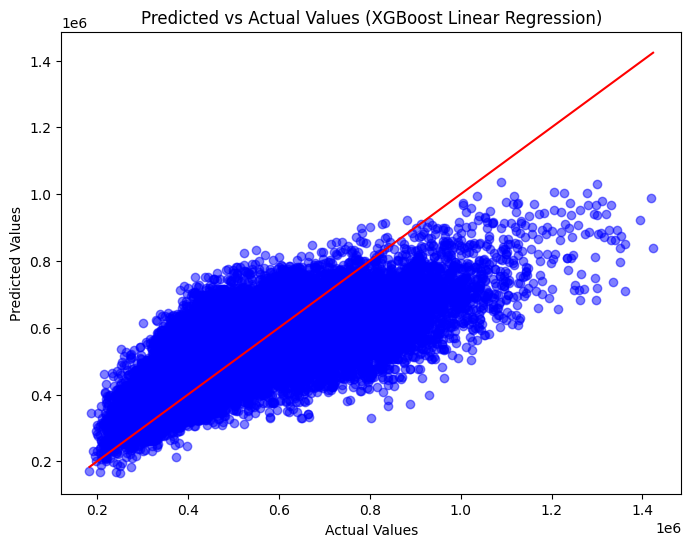

<Figure size 1000x600 with 0 Axes>

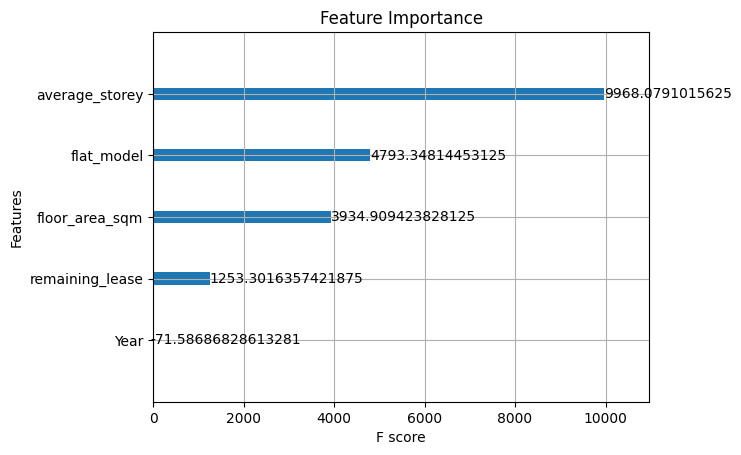

In [23]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Plot predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values (XGBoost Linear Regression)')
plt.show()

# Plot feature importance
plt.figure(figsize=(10, 6))
xgb.plot_importance(xgb_reg, max_num_features=5)  # Adjust max_num_features as needed
plt.title('Feature Importance')
plt.show()

In [24]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scores = abs(cross_val_score(xgb_reg, X_test, y_test, cv=kf, scoring='neg_mean_squared_error'))
mse_scores


array([1.38222720e+10, 1.36226692e+10, 1.32930007e+10, 1.34327930e+10,
       1.46583599e+10])